         Date  Maximum Temperature degrees (F)  \
0  2020-01-01                             36.0   
1  2020-01-02                             37.0   
2  2020-01-03                             36.0   
3  2020-01-04                             30.0   
4  2020-01-05                             38.0   

   Minimum Temperature degrees (F) Precipitation (inches) Snow (inches)  \
0                             13.0                   0.00          0.00   
1                             31.0                   0.00          0.00   
2                             24.0                      T             T   
3                             24.0                   0.00          0.00   
4                             24.0                   0.01             T   

  Snow Depth (inches)  
0                5.00  
1                5.00  
2                4.00  
3                4.00  
4                4.00  


Text(0, 0.5, 'Inches')

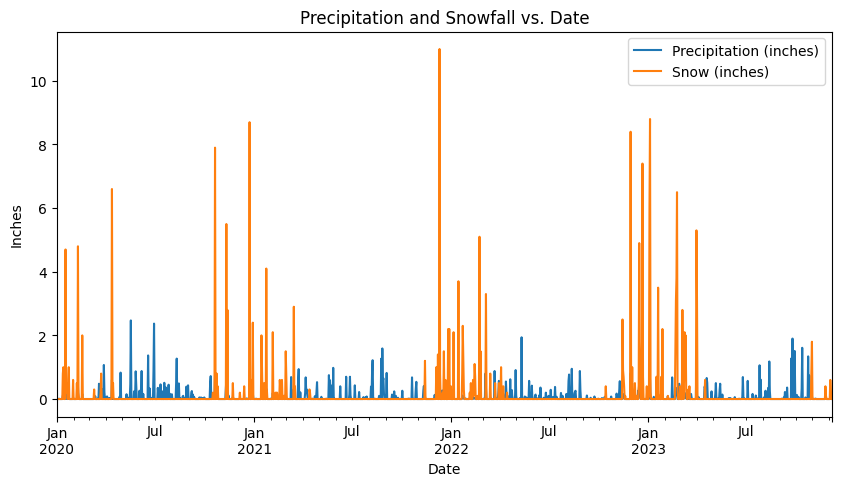

In [23]:
#altering data frame
import pandas as pd
import matplotlib.pyplot as plt

weather_df = pd.read_csv("weather.csv")
print(weather_df.head())
weather_df["Precipitation (inches)"] = weather_df["Precipitation (inches)"].replace("T", "0.0")
weather_df["Snow (inches)"] = weather_df["Snow (inches)"].replace("T", "0.0")
weather_df["Precipitation (inches)"] = pd.to_numeric(weather_df["Precipitation (inches)"])
weather_df["Snow (inches)"] = pd.to_numeric(weather_df["Snow (inches)"])
weather_df["Date"] = pd.to_datetime(weather_df["Date"])


In [ ]:

#different types of precipitation vs. date
weather_df.plot(x = "Date", y = ["Precipitation (inches)", "Snow (inches)"], figsize = (10, 5))
plt.title("Precipitation and Snowfall vs. Date")
plt.xlabel("Date")
plt.ylabel("Inches")


[8.7, 11.0, 8.4, 8.8]


Text(0, 0.5, 'Inches')

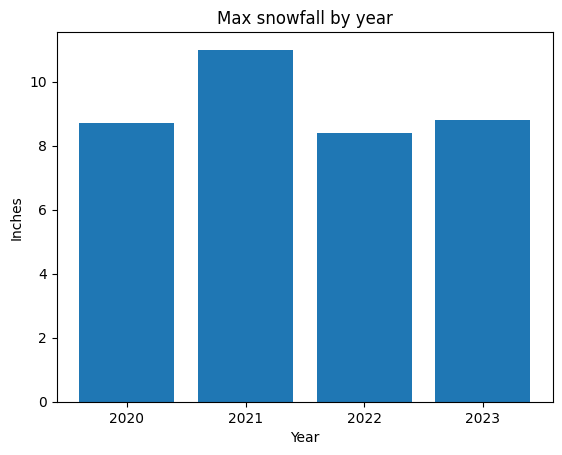

In [64]:
#max snowfall by year 
df_snow = weather_df[weather_df["Snow (inches)"] > 0]
max_annual_snow = [df_snow[df_snow["Date"].dt.year == i]["Snow (inches)"].max() for i in range (2020, 2024)]
print(max_annual_snow)
plt.bar([str(year) for year in range(2020,2024)], max_annual_snow, label = range(2020,2024))
plt.title ("Max snowfall by year")
plt.xlabel("Year")
plt.ylabel("Inches")

Text(0, 0.5, 'Inches')

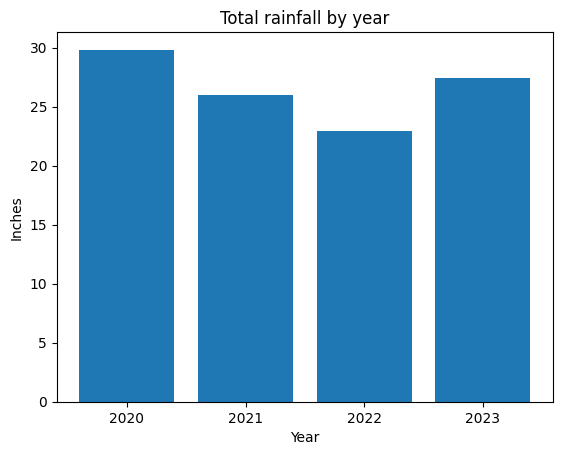

In [61]:
#total rainfall by year -- not done
df_rain = weather_df[weather_df["Precipitation (inches)"] > 0]
#total_annual_rain = [df_rain[df_rain["Date"].dt.year == i]["Precipitation (inches)"].max() for i in range (2020, 2024)]
total_annual_rain = df_rain.groupby(df_rain["Date"].dt.year)["Precipitation (inches)"].sum()
plt.bar([str(year) for year in range(2020,2024)], total_annual_rain, label = range(2020,2024))
plt.title ("Total rainfall by year")
plt.xlabel("Year")
plt.ylabel("Inches")

In [32]:
# Challenge - using list comprehensions, or another method get the maximum temperature of every month in 2022
df2022 = weather_df[weather_df["Date"].dt.year == 2022]
#max_monthly_temps = [max(["Maximum Temperature degrees (F)"])]
max_temperatures = [df2022[df2022["Date"].dt.month == i]["Maximum Temperature degrees (F)"].max() for i in range(1, 13)]
print(max_temperatures)

[42.0, 44.0, 65.0, 74.0, 92.0, 101.0, 95.0, 95.0, 92.0, 80.0, 76.0, 39.0]


Text(0, 0.5, 'Inches')

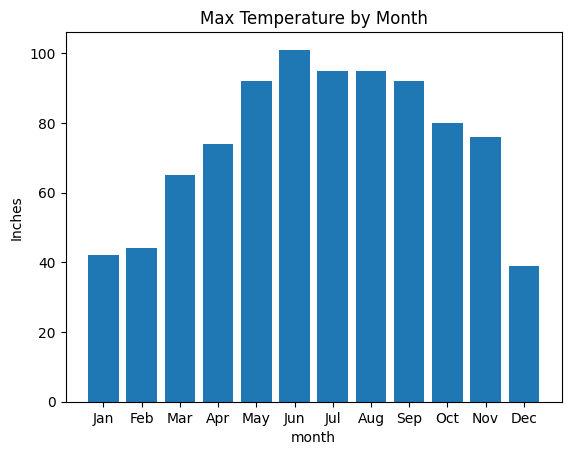

In [54]:
plt.bar(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct", "Nov", "Dec"], max_temperatures)
plt.title ("Max Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Inches")